# Set up

In [19]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=0dfa3d7b1764dbfc3f7ba2dfda2ccc5adf104ce710ed1ed4f78f1e119f44c6de
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd

In [4]:
from sentence_transformers import SentenceTransformer, models

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tseh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.translate import meteor

In [15]:
df = pd.read_csv('matched_data.csv', nrows=30000, index_col=0)

In [16]:
from tqdm.notebook import tqdm

In [22]:
df.sample(10)

,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,Area,...,Авто,years,city,education,skills,job_description,resume_description,job_emb,resume_emb,positive_score
Ids,,,,,,,,,,,,,,,,,,,,,
49478811,Медиалогия,инженер-программист,True,35000.0,45000.0,Нет опыта,Удаленная работа,"[XML, HTML, regex]",Требования: Знание HTML и Интернет Технологий....,Москва,...,Не указано,11.0,Москва,Высшее образование,"Требуемые навыки: XML, HTML, regex",Требования: Знание HTML и Интернет Технологий....,Ищет работу на должность: инженер-программист ...,"[-0.022739599, -0.0018893045, 0.00622323, 0.00...","[-0.027461909, 0.003771721, -0.01292145, -0.02...",0.002247
50041661,Лукин Владимир Владимирович,координатор проекта,True,52200.0,NaN,От 1 года до 3 лет,Удаленная работа,"[Работа в команде, Ориентация на результат, Ст...",Клуб здорового позвоночника и суставов Елены А...,Москва,...,Не указано,8.0,Волжский,Среднее специальное образование,"Требуемые навыки: Работа в команде, Ориентация...",Клуб здорового позвоночника и суставов Елены А...,Ищет работу на должность: координатор проекта ...,"[-0.017031644, -0.0067886217, 0.0052726623, -0...","[-0.00047362276, 0.021561436, 0.002903749, -0....",0.005589
48758085,РТ Лабс,аналитик,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"[UML, SQL, XML, BPMN, Xsd, JSON API, SOAP, RES...",РТЛАБС. GOSUSLUGI.RU – ЭТО МЫ Команда РТЛабс д...,Москва,...,Не указано,14.0,Москва,Высшее образование,"Требуемые навыки: UML, SQL, XML, BPMN, Xsd, JS...",РТЛАБС. GOSUSLUGI.RU – ЭТО МЫ Команда РТЛабс д...,Ищет работу на должность: аналитик Опыт работы...,"[0.00758291, -0.011893333, 0.009592797, -0.000...","[-0.029814119, -0.006846138, 0.037022635, -0.0...",0.000417
47776335,ALM Works,frontend developer,True,200000.0,NaN,От 1 года до 3 лет,Удаленная работа,"[JavaScript, CSS3, HTML, HTML5, TypeScript, jQ...",ALM Works – неформальная IT компания. Более 16...,Санкт-Петербург,...,Не указано,1.0,Севастополь,Высшее образование,"Требуемые навыки: JavaScript, CSS3, HTML, HTML...",ALM Works – неформальная IT компания. Более 16...,Ищет работу на должность: frontend developer О...,"[-0.0073137707, -0.006310538, -0.02290891, 0.0...","[-0.012384938, -0.015031713, -0.00078491727, 0...",0.009383
49355594,Millennium,web-разработчик,True,120000.0,NaN,От 1 года до 3 лет,Удаленная работа,"[MySQL, PHP, Docker, REST, SOAP, Java Script, ...","Мы профессиональная компания, предоставляющая ...",Санкт-Петербург,...,Не указано,1.0,Москва,Высшее образование,"Требуемые навыки: MySQL, PHP, Docker, REST, SO...","Мы профессиональная компания, предоставляющая ...",Ищет работу на должность: web-разработчик Опыт...,"[-0.021425692, -0.0020937906, 0.007211006, 0.0...","[-0.019466486, 0.0048293336, -0.012427316, -0....",0.004794
49989025,Кубовцова Жанна Александровна,программист 1с,True,100000.0,NaN,От 3 до 6 лет,Удаленная работа,[],Программист 1С Прозрачный расчет ЗП! Условия: ...,Москва,...,Не указано,14.0,Москва,Высшее образование,Требуемые навыки:,Программист 1С Прозрачный расчет ЗП! Условия: ...,Ищет работу на должность: программист 1с Опыт ...,"[-0.018468374, 0.013079717, -0.007835512, -0.0...","[-0.0300256, 0.034387425, -0.003693665, -0.014...",0.007281
50045631,Александр Трофимов,тестировщик,True,45000.0,55000.0,Нет опыта,Удаленная работа,"[Грамотная речь, Грамотность, Удаленная работа]",Развивающаяся платформа ищет тестировщиков на ...,Москва,...,Не указано,3.0,Москва,Высшее образование,"Требуемые навыки: Грамотная речь, Грамотность,...",Развивающаяся платформа ищет тестировщиков на ...,Ищет работу на должность: тестировщик Опыт раб...,"[-0.0063816453, -0.00075767224, 0.007241143, -...","[-0.025262447, 0.029251942, -0.009177652, -0.0...",0.001943
48758085,РТ Лабс,аналитик,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"[UML, SQL, XML, BPMN, Xsd, JSON API, SOAP, RES...",РТЛАБС. GOSUSLUGI.RU – ЭТО МЫ Команда РТЛабс д...,Москва,...,Не указано,9.0,Химки,Высшее образование,"Требуемые навыки: UML, SQL, XML, BPMN, Xsd, JS...",РТЛАБС. GOSUSLUGI.RU –

In [7]:
df.columns

Index(['Employer', 'Name', 'Salary', 'From', 'To', 'Experience', 'Schedule',
       'Keys', 'Description', 'Area', 'Professional roles', 'Specializations',
       'Profarea names', 'Published at', 'min_years', 'index', 'Пол, возраст',
       'ЗП', 'Ищет работу на должность:', 'Город, переезд, командировки',
       'Занятость', 'График', 'Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Образование и ВУЗ',
       'Обновление резюме', 'Авто', 'years', 'city', 'education'],
      dtype='object')

In [17]:
df['Keys'] = df['Keys'].apply(eval)

In [18]:
df['skills'] = df['Keys'].apply(lambda x: 'Требуемые навыки: ' + ', '.join(x))

In [19]:
df['Specializations'] = df['Specializations'].apply(eval)

In [20]:
df['Specializations'] = df['Specializations'].apply(lambda x: ', '.join(x))

In [21]:
df['job_description'] = df['Description'] + ' ' +  df['skills'] + ' ' + df['Specializations'] + '. Требуемый опыт:' + df['Experience']

In [22]:
df['resume_description'] = 'Ищет работу на должность: ' + df['Ищет работу на должность:'] +' ' + df['Опыт работы'] + ' ' + df['Образование и ВУЗ']

In [11]:
df['resume_description']

Ids
48957743    Ищет работу на должность: системный администра...
48957743    Ищет работу на должность: системный администра...
48957743    Ищет работу на должность: системный администра...
48957743    Ищет работу на должность: системный администра...
48957743    Ищет работу на должность: системный администра...
                                  ...                        
50036543    Ищет работу на должность: программист 1с Опыт ...
50036543    Ищет работу на должность: программист 1с Опыт ...
50036543    Ищет работу на должность: программист 1с Опыт ...
50036543    Ищет работу на должность: программист 1с Опыт ...
50036543    Ищет работу на должность: программист 1с Опыт ...
Name: resume_description, Length: 30000, dtype: object

In [12]:
df['job_description']

Ids
48957743    Привет! Компания Advert Line объединяет в себе...
48957743    Привет! Компания Advert Line объединяет в себе...
48957743    Привет! Компания Advert Line объединяет в себе...
48957743    Привет! Компания Advert Line объединяет в себе...
48957743    Привет! Компания Advert Line объединяет в себе...
                                  ...                        
50036543    Команда АРГОС уже 15 лет занимается регулярным...
50036543    Команда АРГОС уже 15 лет занимается регулярным...
50036543    Команда АРГОС уже 15 лет занимается регулярным...
50036543    Команда АРГОС уже 15 лет занимается регулярным...
50036543    Команда АРГОС уже 15 лет занимается регулярным...
Name: job_description, Length: 30000, dtype: object

# Compute metrics

In [ ]:
def get_base_model(model_path):
    model = SentenceTransformer(model_path)

    return model

In [27]:
import numpy as np

from numpy import dot
from numpy.linalg import norm


def compute_similarity(a, b):
    a, b = np.array(a.to_list()), np.array(b.to_list())
    cos_sim = a @ b.T

    out = np.zeros(cos_sim.shape,dtype=bool)
    np.fill_diagonal(out,1)

    return cos_sim[out]

def sample_negative(job_idx):
    return df[df['Ids']!=job_idx].sample(1)['job_emb'].item()

def sample_negative(job_idx):
    return df[df['Ids']!=job_idx].sample(1)['job_emb'].item()

# distiluse-base-multilingual-cased-v1

In [ ]:
model = get_base_model('distiluse-base-multilingual-cased-v1')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [ ]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [ ]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [ ]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

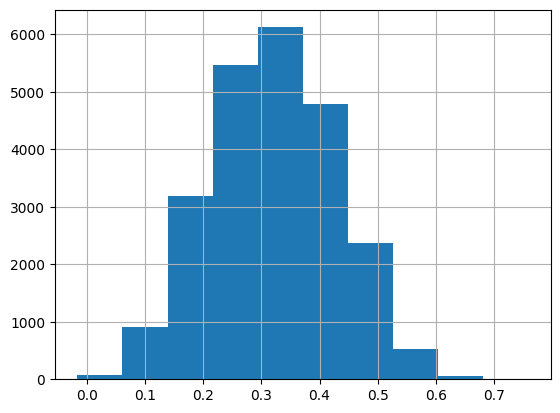

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

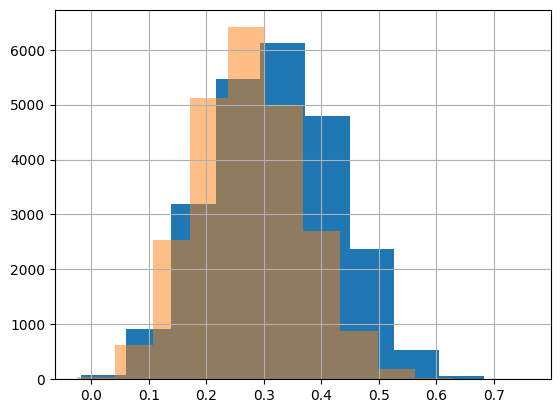

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.3209265172481537


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.2742435932159424


# all-mpnet-base-v2

In [ ]:
model = get_base_model('all-mpnet-base-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [ ]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

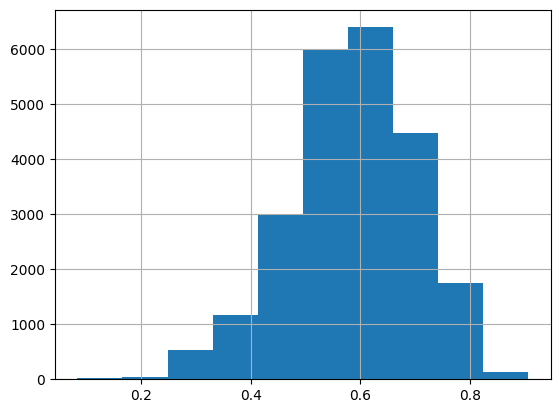

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

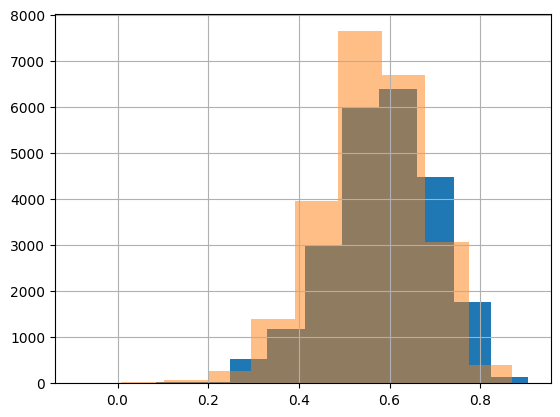

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.5848382711410522


In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.5592855215072632


# paraphrase-multilingual-MiniLM-L12-v2

In [ ]:
model = get_base_model('paraphrase-multilingual-MiniLM-L12-v2')

.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [ ]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

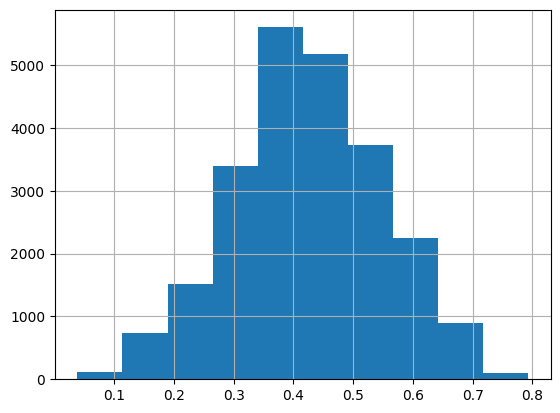

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

# distiluse-base-multilingual-cased-v2

In [ ]:
model = get_base_model('distiluse-base-multilingual-cased-v2')

In [ ]:
model.to('cuda')

In [ ]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

In [ ]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

# Doc2Vec

In [23]:
model = Doc2Vec.load('cv_job_maching_2best.model')

In [24]:
def infer_vector(text):
    return model.infer_vector(word_tokenize(text.lower()))

df['job_emb'] = df['job_description'].apply(lambda x: infer_vector(x) / 10)

In [25]:
df['resume_emb'] = df['resume_description'].apply(lambda x: infer_vector(x)/ 10)

In [28]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

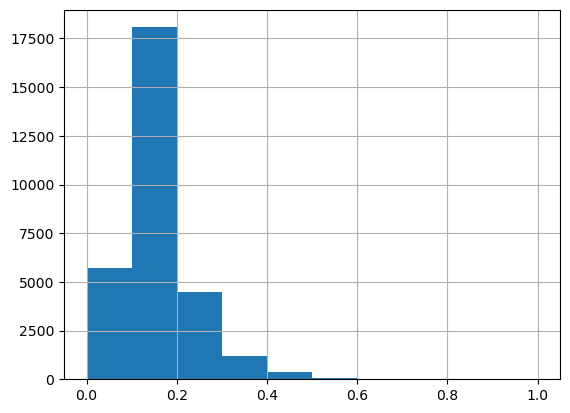

In [29]:
df['positive_score'].hist(range=(0, 1))

In [31]:
df.reset_index(inplace=True)

In [32]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [33]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

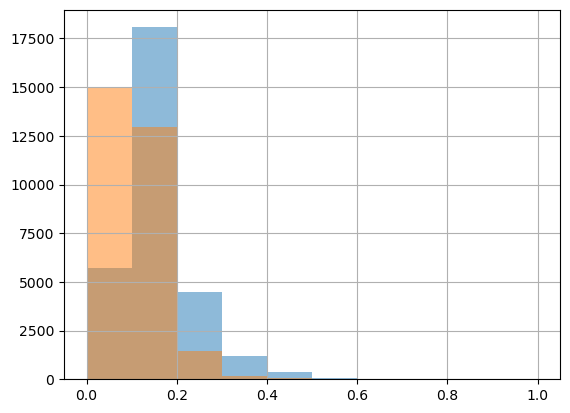

In [34]:
df['positive_score'].hist(alpha=0.5, range=(0, 1))
df['negative_score'].hist(alpha=0.5, range=(0, 1))

In [35]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.15819896757602692


In [36]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.1066921204328537


In [37]:
df["positive_score"].mean() -df["negative_score"].mean()

0.051506847

# Other metrics

## Meteor

In [5]:
round(meteor(
...     [word_tokenize('Hello Mary')],
...     word_tokenize('John loves Mary')
... ), 4)

0.2381

## Bleu

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
reference = [
    'this is a dog'.split(),
    'it is dog'.split(),
    'dog it is'.split(),
    'a dog, it is'.split() 
]
candidate = 'it is a dog'.split()

print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

## Rouge

In [10]:
! pip install rouge-score
from rouge_score import rouge_scorer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=e7073349a352223afa6e31ae72af576893ba5b13453cfecd686e68da6c71217d
  Stored in directory: c:\users\tseh\appdata\local\pip\cache\wheels\5f\dd\89\461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [11]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
candidate_summary = "the cat was found under the bed"
reference_summary = "the cat was under the bed"
scores = scorer.score(reference_summary, candidate_summary)
for key in scores:
    print(f'{key}: {scores[key]}')

rouge1: Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)
rouge2: Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272)
rougeL: Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)
